<a href="https://drive.google.com/file/d/1X7lSTQ564-ltEkWgXzyxokmUUnha4QTE/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

In [7]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from helper import unregularized_model
import tensorflow as tf
np.random.seed(310)
tf.random.set_seed(310)
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Implement an unregularized NN 

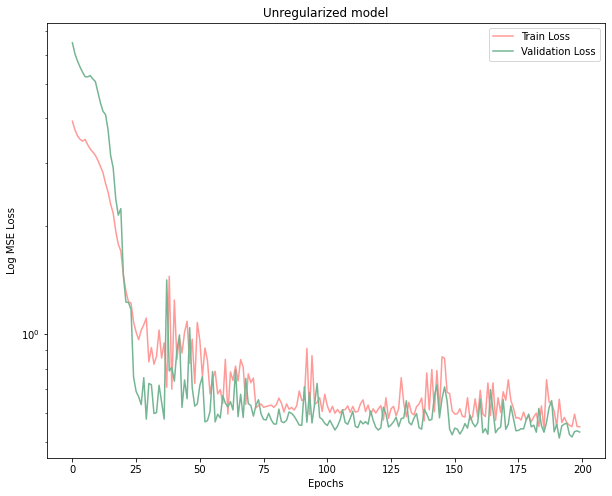

In [8]:
# Call the helper function unregularized_model() to get the unregularized model along with the data
x_b, x_train, x_test, y_train, y_test, y_pred, mse = unregularized_model()

In [9]:
# Printing the MSE of the unregularized model
print("MSE of the unregularized model is", mse)

MSE of the unregularized model is 0.5316067336326562


## Implement the NN with batch normalization 
Build the same network with batch normalization layers after each activation.

In [24]:
# Building a batch normalization regularized NN. 

# Initialise the network, give it an appropriate name for the ease of reading
# The NN has 5 layers, each with 100 nodes
model_2 = models.Sequential(name='BatchNorm')

# Add 5 hidden layers with 100 neurons each 
# tanh is the activation for the first layer
# relu is the activation for all other layers

# After each dense hidden layer add a simple batch normalization layer with default parameters
# The total number of layers here will add to 10
model_2.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))

model_2.add(layers.Dense(100,  activation='relu'))


model_2.add(layers.Dense(100,  activation='relu'))


model_2.add(layers.Dense(100,  activation='relu'))


model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(tf.keras.layers.BatchNormalization())


# Add the output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_2.summary()

Model: "BatchNorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               200       
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_20 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                         

In [25]:
from sklearn import metrics
# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
opt = tf.keras.optimizers.Adam(lr = 0.001)
model_2.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])

# Save the history about the model after fitting on the train data
# Use 0.2 validation split  with 1500 epochs and batch size of 10
history_2 = model_2.fit(x_train,y_train,batch_size=10,epochs=1500,validation_split=0.2)


Epoch 1/1500
2/2 [==============================] - 1s 178ms/step - loss: 4.7584 - mean_squared_error: 4.7584 - val_loss: 1.2181 - val_mean_squared_error: 1.2181
Epoch 2/1500
2/2 [==============================] - 0s 36ms/step - loss: 4.1314 - mean_squared_error: 4.1314 - val_loss: 1.2993 - val_mean_squared_error: 1.2993
Epoch 3/1500
2/2 [==============================] - 0s 24ms/step - loss: 2.8614 - mean_squared_error: 2.8614 - val_loss: 1.3830 - val_mean_squared_error: 1.3830
Epoch 4/1500
2/2 [==============================] - 0s 25ms/step - loss: 2.4693 - mean_squared_error: 2.4693 - val_loss: 1.4298 - val_mean_squared_error: 1.4298
Epoch 5/1500
2/2 [==============================] - 0s 24ms/step - loss: 2.4639 - mean_squared_error: 2.4639 - val_loss: 1.4287 - val_mean_squared_error: 1.4287
Epoch 6/1500
2/2 [==============================] - 0s 24ms/step - loss: 2.0428 - mean_squared_error: 2.0428 - val_loss: 1.4645 - val_mean_squared_error: 1.4645
Epoch 7/1500
2/2 [===============

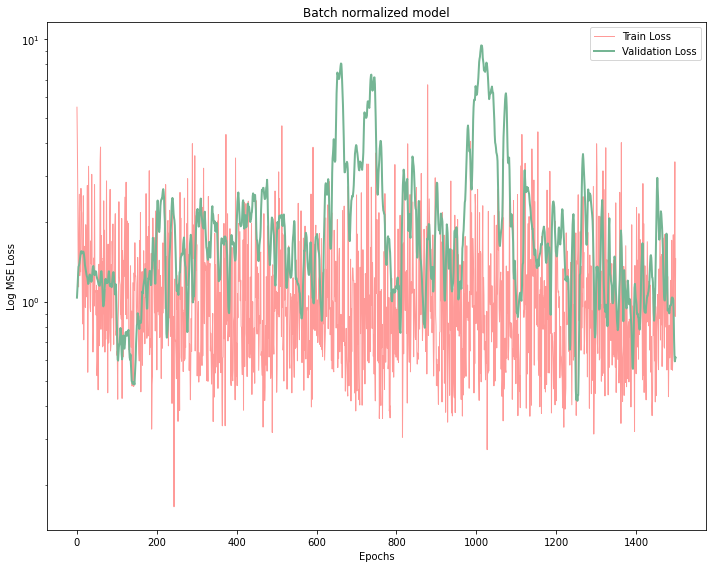

In [12]:
# Helper function to plot the data
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Batch normalized model")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=1)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.tight_layout()
plt.legend()
plt.show()

In [26]:
# Use the batch norm implemented model above to predict for x_b (used exclusively for plotting)
y_bn_pred = model_2.predict(x_b)

# Use the batch norm implemented model above to predict for x_text
y_bn_pred_test = model_2.predict(x_test)

# Compute the MSE on the test data
mse_bn = mean_squared_error(y_test,y_bn_pred_test)

In [14]:
### edTest(test_mse) ###
# Print the MSE of the batch normalization regularized model
print("MSE of the model regularized using batch normalization is", mse_bn)

MSE of the model regularized using batch normalization is 5.888362729415929


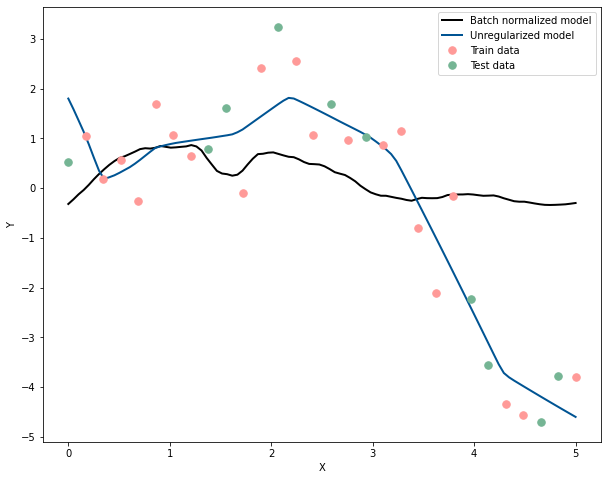

In [15]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_bn_pred, label='Batch normalized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

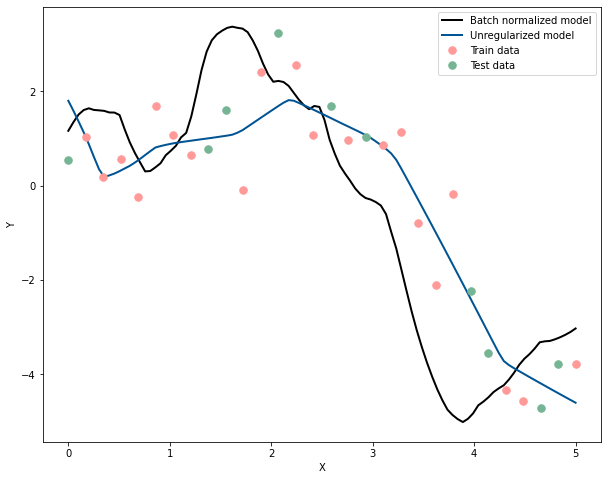

In [23]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_bn_pred, label='Batch normalized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

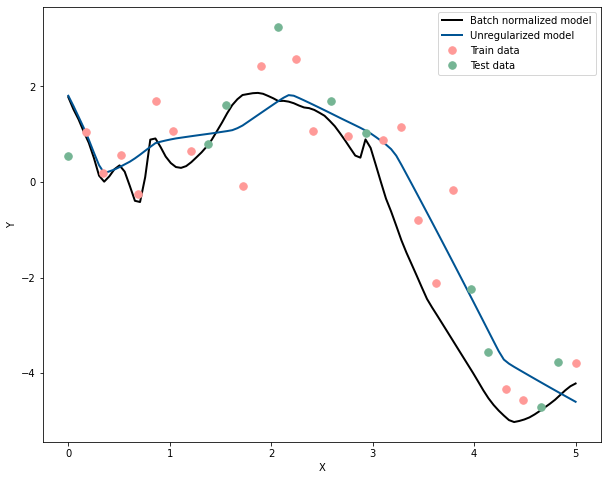

In [27]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_bn_pred, label='Batch normalized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Mindchow 🍲

<b>After marking, make changes to answer the following questions:
1. Add a momentum parameter to the batch normalization layers. Pass 0.1 as the value to this parameter. Take a look at both the graphs. Do you notice any change? While value is more efficient?
2. Remove all batch normalization layers and add only one with default parameters before the output layer. What changes do you observe?</b>

*Your answer here* 

## Lower Momentum allows more fluctuations within the graph. In this case, lower momentum yields better performance. 


## Removing all batch normalization somehow lead to overfitting. 
